In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Data/ml-100k/u.data",sep='\t')

In [4]:
df.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [5]:
columns_names= ["user_id", "item_id", "rating", "timestamp"]

In [6]:
df= pd.read_csv("Data/ml-100k/u.data", sep='\t', names=columns_names)

In [7]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
df['user_id'].nunique()

943

In [9]:
df['item_id'].nunique()

1682

In [10]:
movies_titles= pd.read_csv("Data/ml-100k/item", sep='\|', header=None)

In [11]:
movies_titles.shape

(722, 24)

In [12]:
movies_titles= movies_titles[[0,1]]

In [13]:
movies_titles.columns= ['item_id', 'title']

In [14]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
df= pd.merge(df, movies_titles, on="item_id")

In [16]:
df.tail()

,user_id,item_id,rating,timestamp,title
81111,358,666,3,891269992,Blood For Dracula (Andy Warhol's Dracula) (1974)
81112,279,666,2,890451373,Blood For Dracula (Andy Warhol's Dracula) (1974)
81113,7,666,4,892132192,Blood For Dracula (Andy Warhol's Dracula) (1974)
81114,405,666,1,885549635,Blood For Dracula (Andy Warhol's Dracula) (1974)
81115,615,666,2,879448270,Blood For Dracula (Andy Warhol's Dracula) (1974)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [18]:
df.groupby('title').mean()

,user_id,item_id,rating,timestamp
title,,,,
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
"20,000 Leagues Under the Sea (1954)",476.125000,141.0,3.500000,8.830089e+08
2001: A Space Odyssey (1968),460.965251,135.0,3.969112,8.828325e+08
...,...,...,...,...
Wyatt Earp (1994),506.860000,570.0,3.100000,8.850119e+08
Young Frankenstein (1974),452.550000,208.0,3.945000,8.834702e+08
Young Guns (1988),456.168317,232.0,3.207921,8.835963e+08


In [19]:
df.groupby('title').mean()['rating']

title
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
20,000 Leagues Under the Sea (1954)      3.500000
2001: A Space Odyssey (1968)             3.969112
                                           ...   
Wyatt Earp (1994)                        3.100000
Young Frankenstein (1974)                3.945000
Young Guns (1988)                        3.207921
Young Poisoner's Handbook, The (1995)    3.341463
unknown                                  3.444444
Name: rating, Length: 716, dtype: float64

In [20]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Maya Lin: A Strong Clear Vision (1994)               4.500000
Close Shave, A (1995)                                4.491071
Schindler's List (1993)                              4.466443
Wrong Trousers, The (1993)                           4.466102
Casablanca (1942)                                    4.456790
                                                       ...   
Amityville 3-D (1983)                                1.166667
Amityville: A New Generation (1993)                  1.000000
3 Ninjas: High Noon At Mega Mountain (1998)          1.000000
Amityville 1992: It's About Time (1992)              1.000000
Police Story 4: Project S (Chao ji ji hua) (1993)    1.000000
Name: rating, Length: 716, dtype: float64

In [21]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                                     583
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
                                                    ... 
So Dear to My Heart (1949)                             4
Daniel Defoe's Robinson Crusoe (1996)                  2
Substance of Fire, The (1996)                          1
Police Story 4: Project S (Chao ji ji hua) (1993)      1
Fire on the Mountain (1996)                            1
Name: rating, Length: 716, dtype: int64

In [22]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [23]:
ratings.head()

,rating
title,
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112


In [24]:
ratings['num of ratings']= pd.DataFrame(df.groupby('title').count()['rating'])

In [25]:
ratings

,rating,num of ratings
title,,
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
...,...,...
Wyatt Earp (1994),3.100000,50
Young Frankenstein (1974),3.945000,200
Young Guns (1988),3.207921,101


In [26]:
ratings.sort_values(by='rating', ascending=False)

,rating,num of ratings
title,,
Maya Lin: A Strong Clear Vision (1994),4.500000,4
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
...,...,...
Amityville 3-D (1983),1.166667,6
Police Story 4: Project S (Chao ji ji hua) (1993),1.000000,1
Amityville 1992: It's About Time (1992),1.000000,5


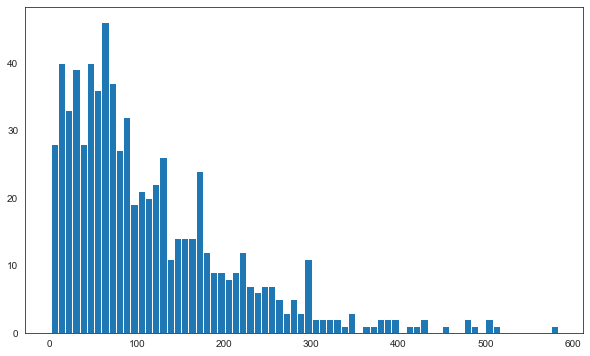

In [27]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'], bins=70)
plt.show()

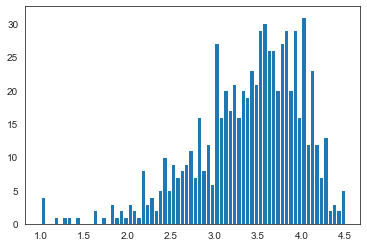

In [28]:
plt.hist(ratings['rating'], bins=70)
plt.show()

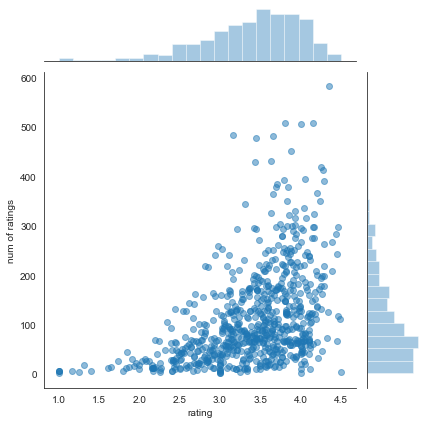

In [29]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

In [30]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [31]:
moviemat= df.pivot_table(index="user_id", columns="title", values="rating")

In [32]:
moviemat

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,"Wizard of Oz, The (1939)",Wolf (1994),"Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),"Young Poisoner's Handbook, The (1995)",unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,5.0,NaN,3.0,4.0,NaN,NaN,NaN,3.0,3.0,...,4.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
ratings.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [34]:
moviemat['Star Wars (1977)']

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [35]:
starwars_user_ratings=moviemat['Star Wars (1977)']

In [36]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [37]:
similar_to_starwars

title
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
20,000 Leagues Under the Sea (1954)      0.289768
2001: A Space Odyssey (1968)             0.230884
                                           ...   
Wyatt Earp (1994)                        0.059560
Young Frankenstein (1974)                0.192589
Young Guns (1988)                        0.186377
Young Poisoner's Handbook, The (1995)   -0.007374
unknown                                  0.723123
Length: 716, dtype: float64

In [38]:
corr_starwars=pd.DataFrame(similar_to_starwars, columns=['correlation'])

In [39]:
corr_starwars.dropna(inplace=True)

In [40]:
corr_starwars.head()

,correlation
title,
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884


In [41]:
corr_starwars.sort_values('correlation', ascending=False).head(10)

,correlation
title,
Star Wars (1977),1.000000
Maya Lin: A Strong Clear Vision (1994),1.000000
Unhook the Stars (1996),0.771744
"Empire Strikes Back, The (1980)",0.747981
unknown,0.723123
"Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",0.707107
Return of the Jedi (1983),0.672556
Dark City (1998),0.605406
"Haunted World of Edward D. Wood Jr., The (1995)",0.583861


In [42]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [43]:
corr_starwars.head()

,correlation,num of ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259


In [44]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('correlation', ascending=False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [45]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie, columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num of ratings'])
    predictions=corr_movie[corr_movie['num of ratings']>100].sort_values('correlation', ascending=False)
    return predictions

In [46]:
predictions= predict_movies("Raiders of the Lost Ark (1981)")

In [47]:
predictions.head()

,correlation,num of ratings
title,,
Raiders of the Lost Ark (1981),1.000000,420
Indiana Jones and the Last Crusade (1989),0.539606,331
"Empire Strikes Back, The (1980)",0.538659,367
Star Wars (1977),0.536117,583
Back to the Future (1985),0.506807,350
